In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import warnings

plt.style.use('seaborn')
sns.set_palette("husl")

df = pd.read_csv('linkedin_jobs_preprocessed.csv')

print("=== Dataset Overview ===")
print(f"Number of job postings: {len(df)}")
print("\nColumns in the dataset:")
for col in df.columns:
    print(f"- {col}: {df[col].dtype}")

print("\nMissing values:")
print(df.isnull().sum())

=== Dataset Overview ===
Number of job postings: 11014

Columns in the dataset:
- job_id: int64
- company_id: float64
- title: object
- description: object
- max_salary: float64
- med_salary: float64
- min_salary: float64
- pay_period: object
- formatted_work_type: object
- location: object
- applies: float64
- original_listed_time: float64
- remote_allowed: float64
- views: float64
- job_posting_url: object
- application_url: object
- application_type: object
- expiry: float64
- closed_time: float64
- formatted_experience_level: object
- skills_desc: object
- listed_time: float64
- posting_domain: object
- sponsored: int64
- work_type: object
- currency: object
- compensation_type: object
- scraped: int64
- annual_min_salary: float64
- annual_med_salary: float64
- annual_max_salary: float64

Missing values:
job_id                            0
company_id                      190
title                             0
description                       0
max_salary                        0



=== Average Salaries by Experience Level ===
                                 mean  count       std
formatted_experience_level                            
Associate                    85998.70   1200  46285.63
Director                    162098.80    481  61352.87
Entry level                  69062.04   2181  35172.31
Executive                   173766.75    110  75530.24
Internship                   58709.77     70  30688.52
Mid-Senior level            115612.17   4150  54720.09


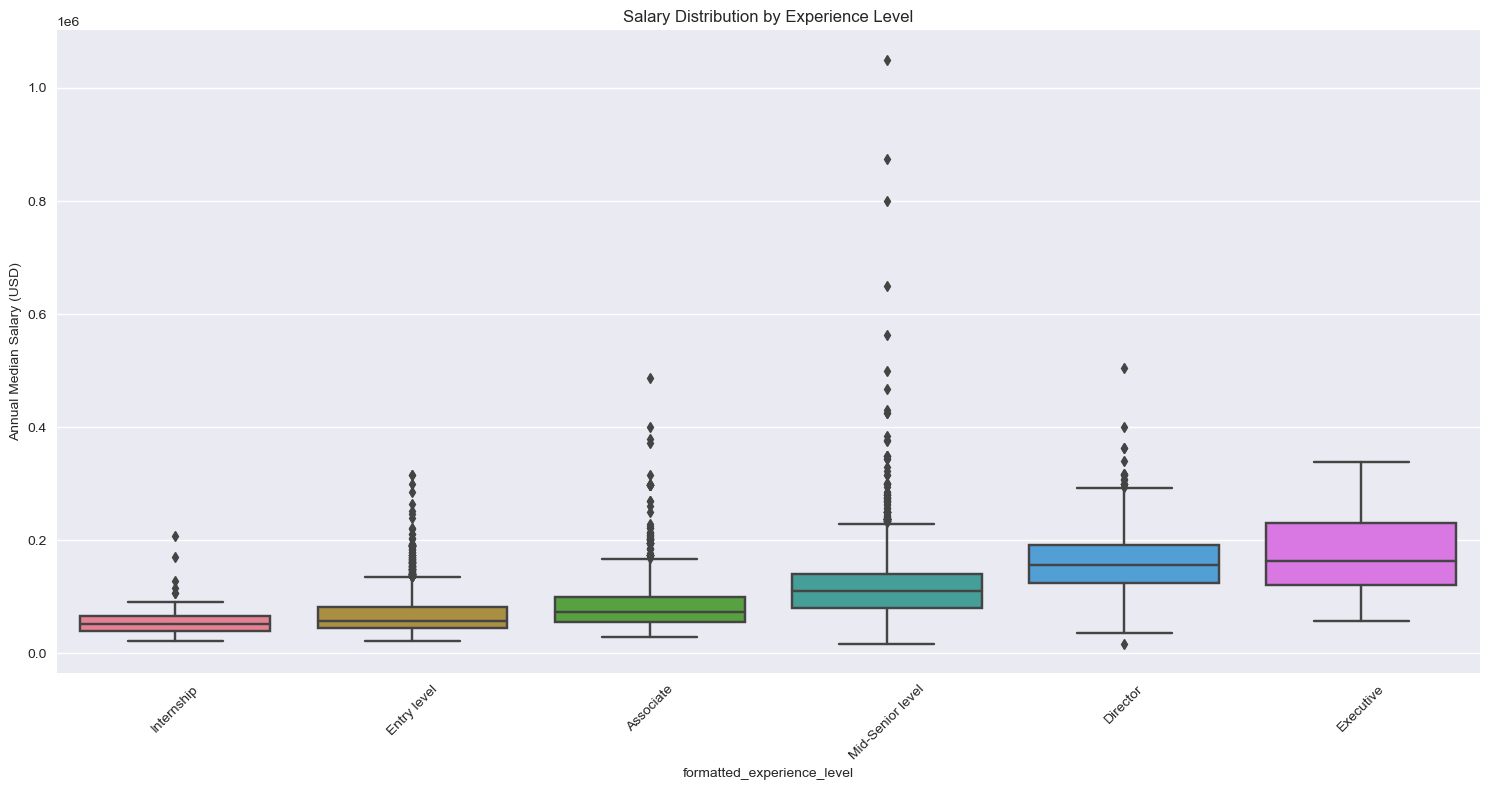

In [21]:

# Salary Analysis by Experience Level
experience_order = ["Internship", "Entry level", "Associate", "Mid-Senior level", "Director", "Executive"]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='formatted_experience_level', y='annual_med_salary', 
               order=experience_order)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Annual Median Salary (USD)')
plt.tight_layout()
plt.savefig('salary_by_experience.png')

# Calculate average salaries by experience level
exp_salary = df.groupby('formatted_experience_level')['annual_med_salary'].agg(['mean', 'count', 'std']).round(2)
print("\n=== Average Salaries by Experience Level ===")
print(exp_salary)

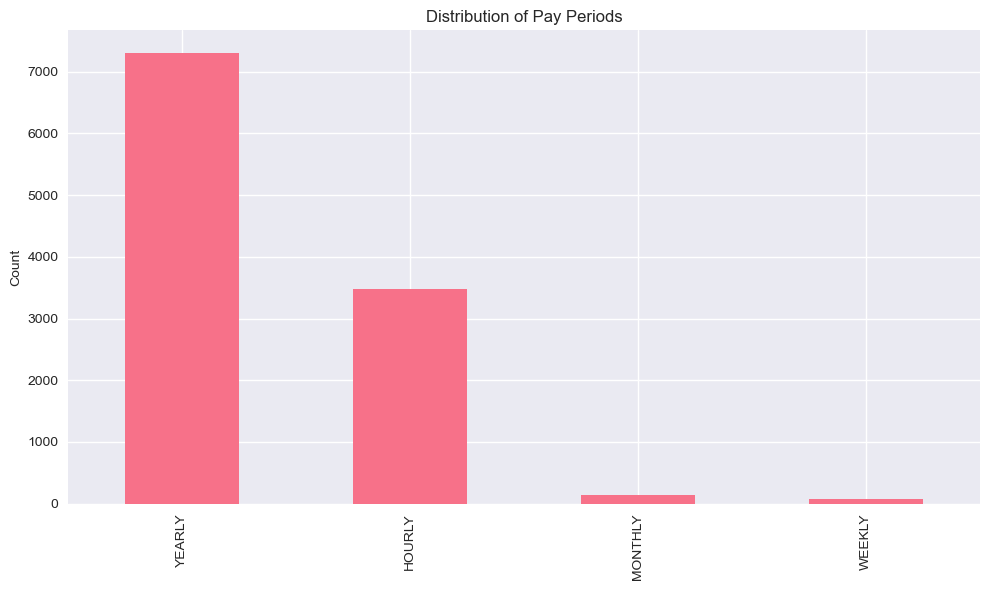

In [11]:

# Pay Period Analysis
pay_period_dist = df['pay_period'].value_counts()
plt.figure(figsize=(10, 6))
pay_period_dist.plot(kind='bar')
plt.title('Distribution of Pay Periods')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('pay_period_dist.png')


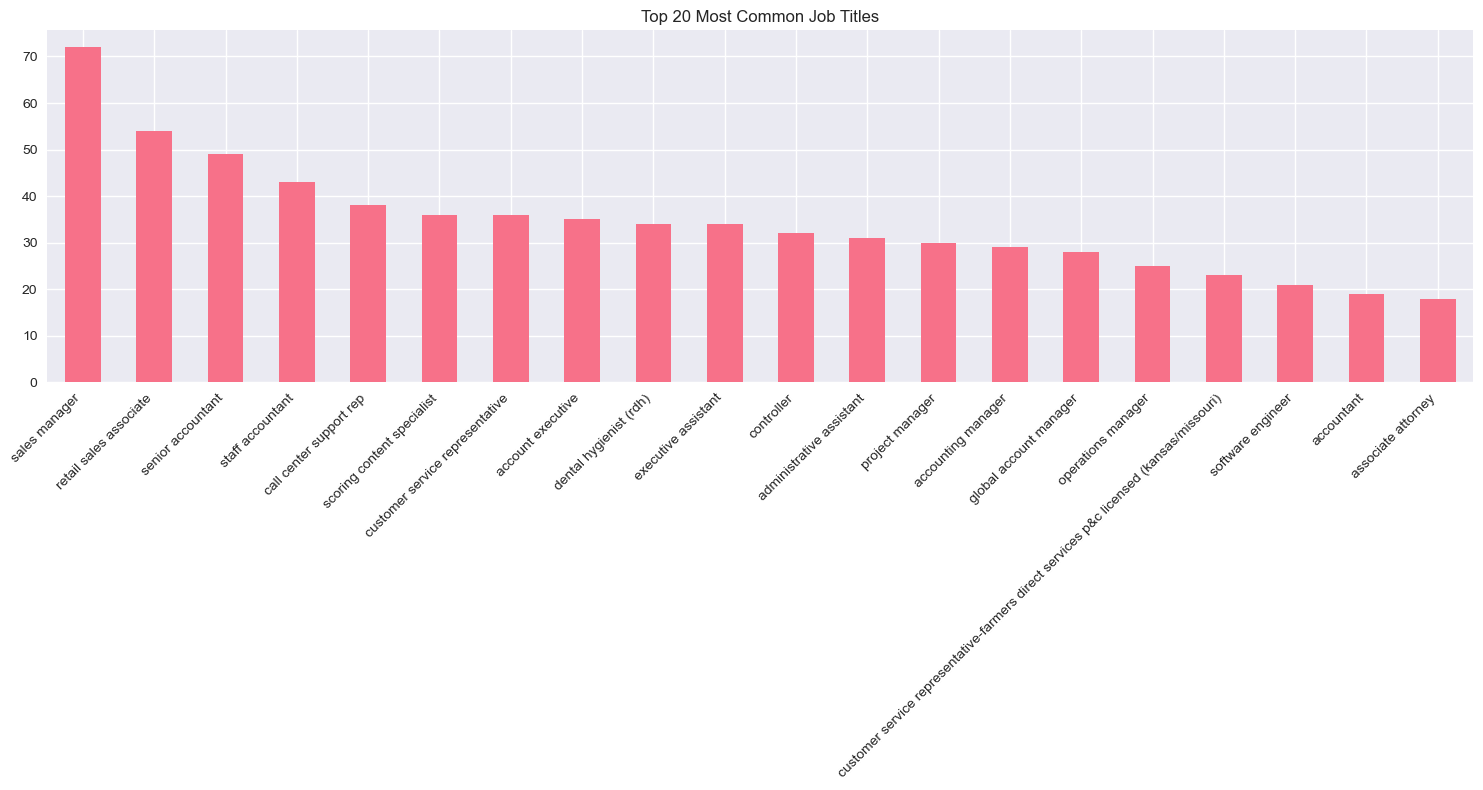

In [13]:

# Most Common Job Titles
# Clean and standardize job titles
def clean_title(title):
    title = title.lower().strip()
    return title

df['clean_title'] = df['title'].apply(clean_title)
top_20_titles = df['clean_title'].value_counts().head(20)

plt.figure(figsize=(15, 8))
top_20_titles.plot(kind='bar')
plt.title('Top 20 Most Common Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_jobs.png')


=== Average Salaries by Top 15 Locations ===
                                      mean  count       std
location                                                   
United States                    120381.67    806  61044.56
New York, NY                     120190.91    524  63576.83
Los Angeles, CA                  113446.07    243  61198.96
Seattle, WA                      120572.31    177  59212.34
New York City Metropolitan Area  121409.31    172  58502.41
San Francisco, CA                141491.51    170  60773.83
Denver, CO                        95698.86    146  47187.28
San Diego, CA                    104335.39    137  52550.40
Chicago, IL                      114158.62    130  55206.12
Dallas, TX                       105773.58    108  57976.06
Atlanta, GA                      115932.08    105  55784.11
Houston, TX                       93665.07    104  48494.87
San Jose, CA                     128250.01     99  61028.50
Austin, TX                       117773.71     99  512

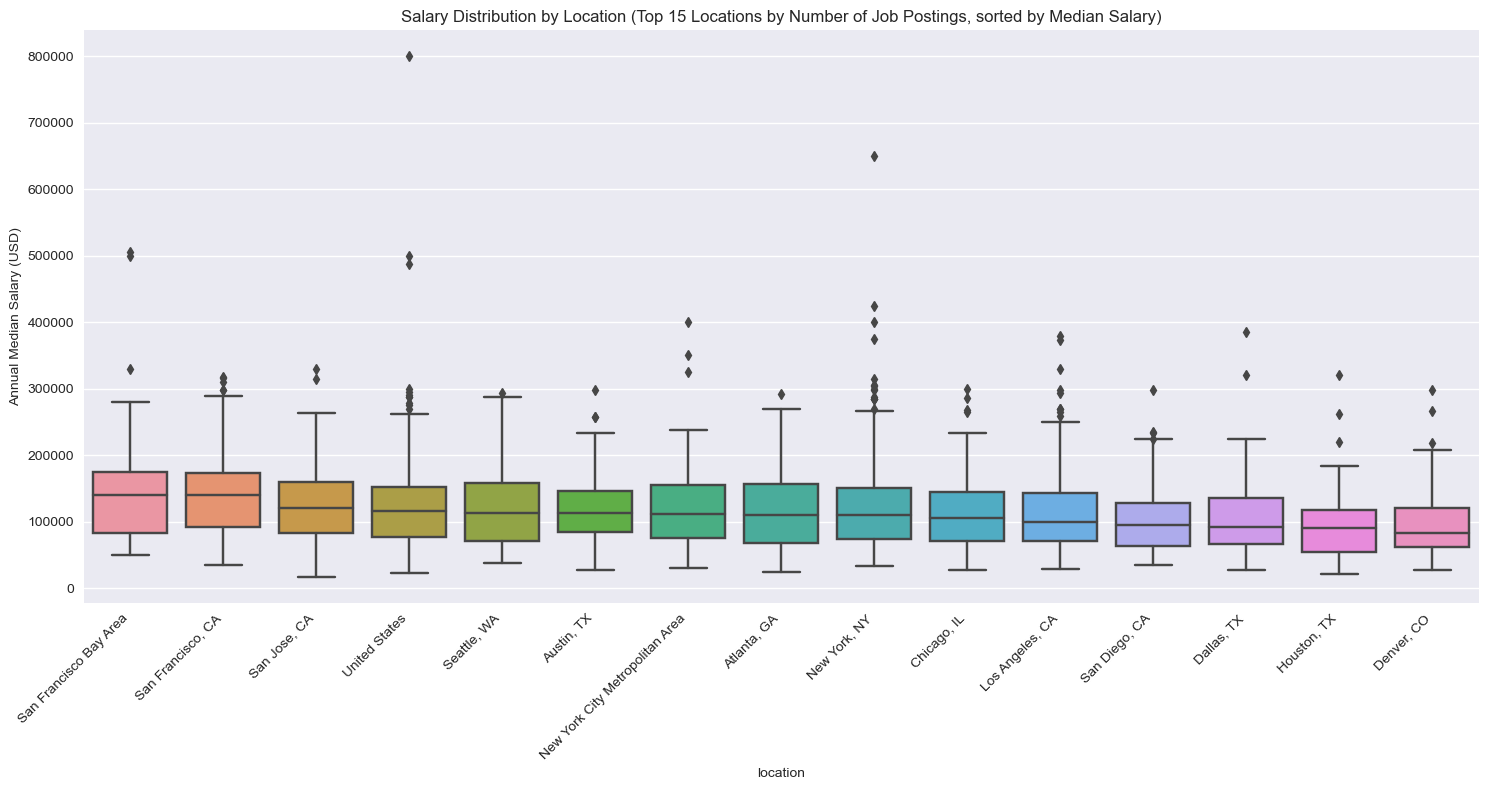

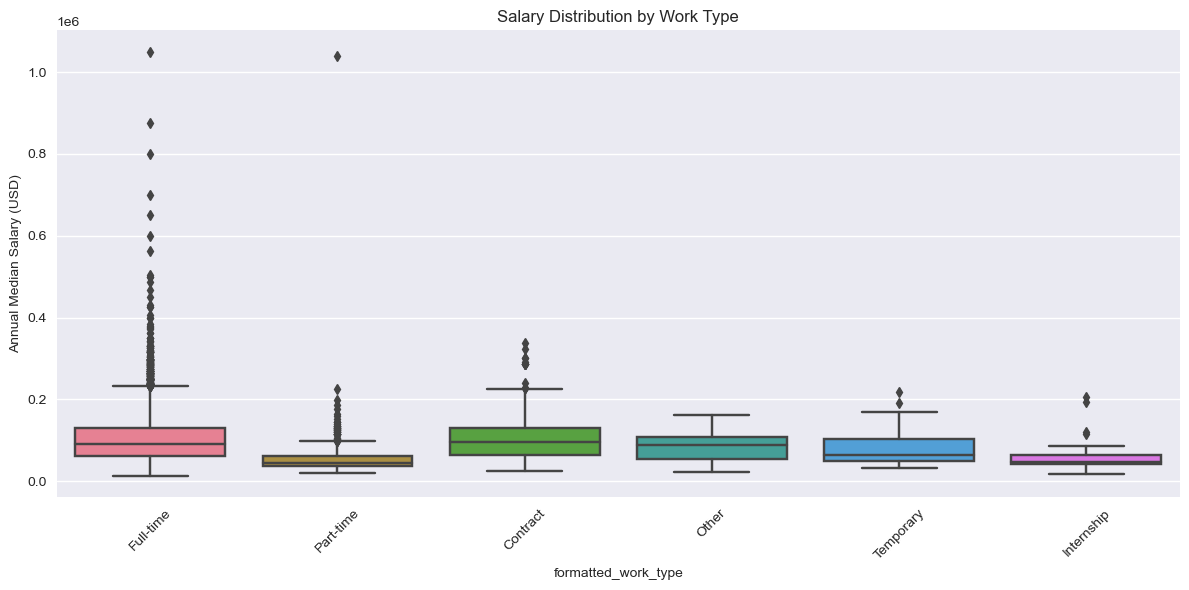

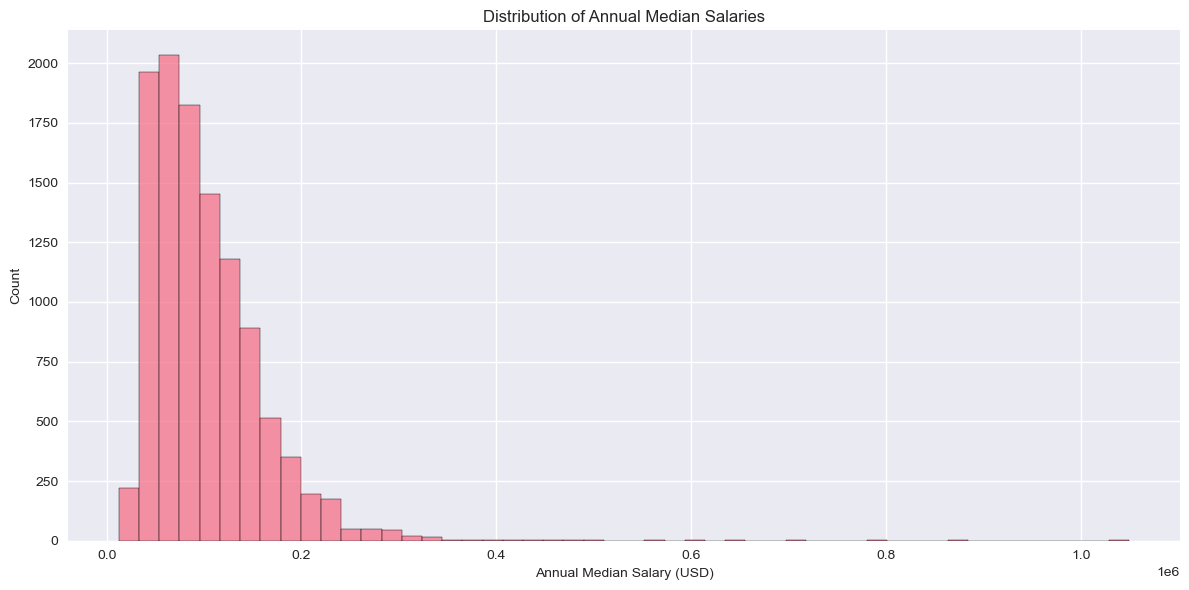

In [23]:
# Salary by Location
# Focus on top 15 locations with most job postings
top_15_locations = df['location'].value_counts().head(15).index
location_data = df[df['location'].isin(top_15_locations)]

location_order = (location_data.groupby('location')['annual_med_salary']
                 .median()
                 .sort_values(ascending=False)
                 .index)

plt.figure(figsize=(15, 8))
sns.boxplot(data=location_data, x='location', y='annual_med_salary',
            order=location_order)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Location (Top 15 Locations by Number of Job Postings, sorted by Median Salary)')
plt.ylabel('Annual Median Salary (USD)')
plt.tight_layout()
plt.savefig('salary_by_location.png')


# Calculate average salaries by location
loc_salary = df.groupby('location')['annual_med_salary'].agg(['mean', 'count', 'std']).round(2)
loc_salary = loc_salary.sort_values('count', ascending=False).head(15)
print("\n=== Average Salaries by Top 15 Locations ===")
print(loc_salary)

# Salary by Work Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='formatted_work_type', y='annual_med_salary')
plt.title('Salary Distribution by Work Type')
plt.ylabel('Annual Median Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('salary_by_worktype.png')


# Calculate average salaries by work type
work_salary = df.groupby('formatted_work_type')['annual_med_salary'].agg(['mean', 'count', 'std']).round(2)
print("\n=== Average Salaries by Work Type ===")
print(work_salary)
    

# Additional Analysis: Salary Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='annual_med_salary', bins=50)
plt.title('Distribution of Annual Median Salaries')
plt.xlabel('Annual Median Salary (USD)')
plt.tight_layout()
plt.savefig('salary_distribution.png')
